Creating layer thickness from the GICC21/GICC05

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#gicc21 = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC21.xlsx', sheet_name=1,usecols=[0,8],names=['gicc21_age', 'grip_depth'],skiprows=1)

#load GICC05 time scale
gicc05 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC05_time_scale.tab', sep="\t",skiprows=41,usecols=[0,4],names=['gicc05_age', 'grip_depth'])
gicc05.dropna(inplace=True)

#load accumulation data
gripacum = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/GRIP/GRIP_gripacum.tab', sep="\t",skiprows=20, header=None, names=['grip_depth', 'age_notused', 'accumulation', 'thickness'])

gripacum

,grip_depth,age_notused,accumulation,thickness
0,0.00,-0.03900,0.249,0.23084
1,0.55,-0.03806,0.252,0.25188
2,1.10,-0.03719,0.211,0.21048
3,1.65,-0.03612,0.235,0.23493
4,2.20,-0.03514,0.222,0.22189
...,...,...,...,...
5420,2981.00,244.13000,0.184,0.00050
5421,2981.55,245.21100,0.173,0.00047
5422,2982.10,246.37700,0.165,0.00044
5423,2982.65,247.61800,0.181,0.00048


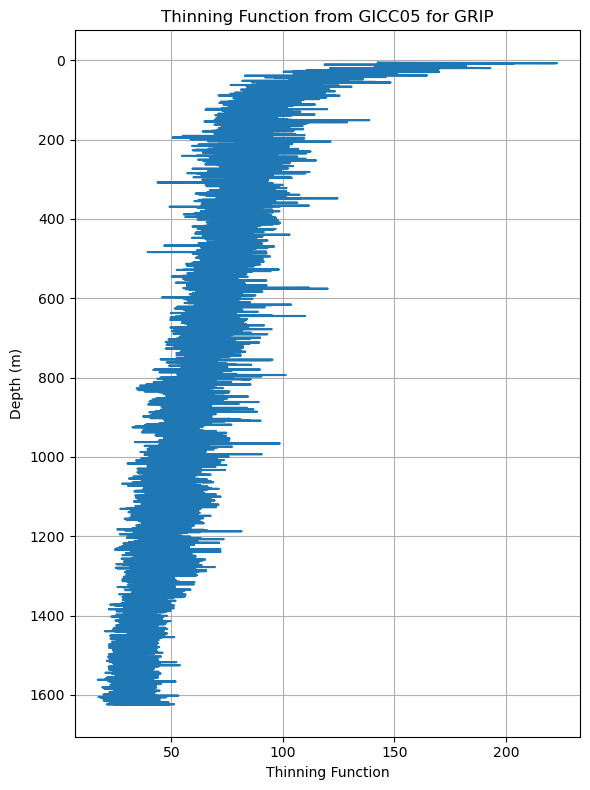

In [68]:
from scipy.ndimage import gaussian_filter1d

# Extract arrays
age = gicc05["gicc05_age"].values
depth = gicc05["grip_depth"].values
accumulation = np.interp(depth, gripacum["grip_depth"].values, gripacum["accumulation"].values)
accumulation = accumulation * 0.01 / 0.921 #convert to m/yr assuming 0.921 density

# Apply Gaussian smoothing to age
#smoothed_age = gaussian_filter1d(age, sigma=2)

# Compute layer thickness λ(z) = 1 / (dt/dz)
dt = np.gradient(age, edge_order=1)
dz = np.gradient(depth, edge_order=1)

lambda_z = 1 / (dt / dz)  # in m/year

# Compute thinning function: S(z) = λ(z) / a(z)
S_z = lambda_z / accumulation

# Plot
plt.figure(figsize=(6, 8))
plt.plot(S_z, depth)
plt.gca().invert_yaxis()
plt.xlabel("Thinning Function")
plt.ylabel("Depth (m)")
plt.title("Thinning Function from GICC05 for GRIP")
plt.grid(True)
plt.tight_layout()
plt.show()




In [66]:
import pandas as pd
import matplotlib.pyplot as plt
thin_test = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC/thinning.txt', comment='#', delimiter='\t')

Text(0, 0.5, 'Depth (m)')

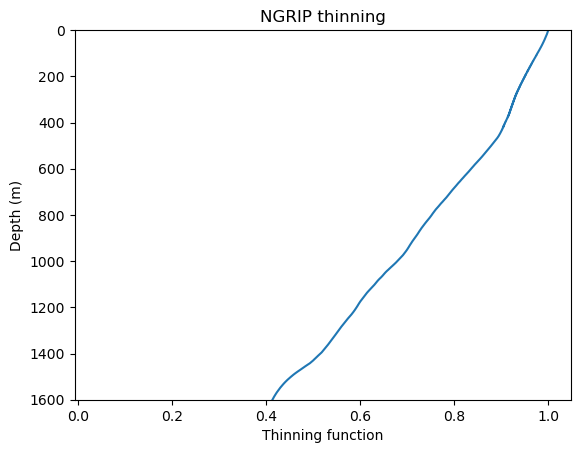

In [69]:
plt.plot(thin_test['thinning'], thin_test['depth'])
plt.title('NGRIP thinning')

plt.ylim(0,1600)

plt.gca().invert_yaxis()

plt.xlabel('Thinning function')
plt.ylabel('Depth (m)')